In [1]:
# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)# To see all the columns of a dataframe
#pd.set_option('display.max_rows', None)

In [2]:
# Function to reduce the memory usage of various Dataframes
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
       
        1. Iterate over every column
        2. Determine if the column is numeric
        3. Determine if the column can be represented by an integer
        4. Find the min and the max value
        5. Determine and apply the smallest datatype that can fit the range of values

    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [3]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [4]:
train = import_data('train_merged_original.csv')

Memory usage of dataframe is 343.12 MB
Memory usage after optimization is: 86.66 MB
Decreased by 74.7%


In [5]:
test = import_data('holdout_merged_original.csv')

Memory usage of dataframe is 114.37 MB
Memory usage after optimization is: 28.89 MB
Decreased by 74.7%


In [6]:
#visualizing the head of the training data
train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_PRODUCT_COMBINATIO

In [7]:
#visualizing the head of the test data
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_PRODUCT_COMBINATIO

## Cleaning the Training & Test Datasets

In [8]:
train.isna().mean()

NAME_CONTRACT_TYPE                                             0.000000
CODE_GENDER                                                    0.000000
FLAG_OWN_CAR                                                   0.000000
FLAG_OWN_REALTY                                                0.000000
CNT_CHILDREN                                                   0.000000
AMT_INCOME_TOTAL                                               0.000000
AMT_CREDIT                                                     0.000000
AMT_ANNUITY                                                    0.000039
AMT_GOODS_PRICE                                                0.000872
NAME_TYPE_SUITE                                                0.004193
NAME_INCOME_TYPE                                               0.000000
NAME_EDUCATION_TYPE                                            0.000000
NAME_FAMILY_STATUS                                             0.000000
NAME_HOUSING_TYPE                                              0

In [9]:
# Calculating % of missing values in the training dataset & Removing columns that have more 
# than 30% of missing values from both training & test set
df_temp = train.isna().mean()*100
df_temp1 = df_temp.loc[df_temp <= 30]
train = train[df_temp1.index]   

In [10]:
# Deleting the same columns from the test set as in above
test = test[df_temp1.index] 

In [11]:
train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_PRODUCT_COMBINATION_POS household without interest,prev_app_PRODUCT_COMBINATION_POS indu

In [12]:
# Converting all the column names for train & test dataset to uppercase
train.columns = train.columns.str.upper()
test.columns = test.columns.str.upper()

In [13]:
# Identifying the Days columns in train dataset
import re
ls=list(filter(lambda x: re.search('\w*DAYS\w*',x), train.columns))

In [14]:
# Converting Days duration to years in train column labels
train[ls] = train[ls]/365

In [15]:
# Converting Days duration to years in test column labels
test[ls] = test[ls]/365

In [16]:
train[ls].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,BU_DAYS_CREDIT,BU_DAYS_CREDIT_ENDDATE,BU_DAYS_CREDIT_UPDATE,PREV_APP_DAYS_DECISION,INSTALL_PAY_DAYS_INSTALMENT,INSTALL_PAY_DAYS_ENTRY_PAYMENT
0,-24.279452,-3.857534,-8.295891,-1.843836,-1.282192,-1.273973,-0.163442,-0.626370,-0.719863,-0.868493,-0.983562
1,-66.145205,1000.665753,-20.405479,-12.608219,-4.484931,-1.213699,2.789041,-0.032877,-1.965753,-2.268493,-2.289041
2,-61.002740,1000.665753,-4.400000,-13.227397,-2.041096,-4.232877,-3.230137,-3.087671,-1.510959,-0.968493,-0.989726
3,-27.339726,-5.320548,-1.438356,-0.282192,-3.934247,NaN,NaN,NaN,-1.523288,-1.817808,-1.858904
4,-23.484932,-4.424658,-8.997260,-2.632877,0.000000,-1.264384,1.141096,-0.324315,-2.536986,-2.246575,-2.264384


In [17]:
test[ls].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,BU_DAYS_CREDIT,BU_DAYS_CREDIT_ENDDATE,BU_DAYS_CREDIT_UPDATE,PREV_APP_DAYS_DECISION,INSTALL_PAY_DAYS_INSTALMENT,INSTALL_PAY_DAYS_ENTRY_PAYMENT
0,-34.197260,-0.750685,-17.950686,-7.473973,0.000000,-6.558904,-3.936986,-3.287671,NaN,NaN,NaN
1,-47.449315,-26.972603,-9.638356,-2.164384,-5.156164,-0.644521,1.526027,-0.312842,-4.194520,-2.316438,-2.328767
2,-24.679452,-0.912329,-1.506849,-4.594521,-4.520548,-3.320548,-0.641096,-1.663014,-4.224658,-2.219178,-2.228767
3,-36.813699,-12.589041,-19.090410,-11.624658,0.000000,NaN,NaN,NaN,-3.016438,-4.498630,-4.528767
4,-49.980822,-1.756164,-26.805479,-4.849315,-0.536986,-2.909589,-3.164384,-1.728767,-0.814384,-0.939726,-0.987671


In [18]:
# Substituting years for days in train dataset
train.columns=list(map(lambda x: x.replace("DAYS","YEARS"), train.columns))

In [19]:
# Substituting years for days in test dataset
test.columns=list(map(lambda x: x.replace("DAYS","YEARS"), test.columns))


In [20]:
#searching for columns with Years word appearing in them
ls=list(filter(lambda x: re.search('\w*YEARS\w*',x), train.columns))

In [21]:
train[ls].head(20)

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,BU_YEARS_CREDIT,BU_YEARS_CREDIT_ENDDATE,BU_YEARS_CREDIT_UPDATE,PREV_APP_YEARS_DECISION,INSTALL_PAY_YEARS_INSTALMENT,INSTALL_PAY_YEARS_ENTRY_PAYMENT
0,-24.279452,-3.857534,-8.295891,-1.843836,-1.282192,-1.273973,-0.163442,-0.626370,-0.719863,-0.868493,-0.983562
1,-66.145205,1000.665753,-20.405479,-12.608219,-4.484931,-1.213699,2.789041,-0.032877,-1.965753,-2.268493,-2.289041
2,-61.002740,1000.665753,-4.400000,-13.227397,-2.041096,-4.232877,-3.230137,-3.087671,-1.510959,-0.968493,-0.989726
3,-27.339726,-5.320548,-1.438356,-0.282192,-3.934247,NaN,NaN,NaN,-1.523288,-1.817808,-1.858904
4,-23.484932,-4.424658,-8.997260,-2.632877,0.000000,-1.264384,1.141096,-0.324315,-2.536986,-2.246575,-2.264384
5,-32.638356,-4.271233,-12.690411,-10.276712,-7.183562,-6.257534,-1.257534,-2.268493,-3.375342,-2.604110,-2.631507
6,-40.221918,-6.038356,-20.317808,-10.868493,-3.232877,NaN,NaN,NaN,-2.183562,-1.567123,-1.620548
7,-54.923288,-28.616438,-7.731507,-9.876712,-5.797260,-3.682192,-2.280822,-2.372603,-4.167123,-4.704110,-4.731507
8,-37.558904,-3.547945,-4.843836,-5.016438,0.000000,-3.046575,-2.172603,-1.612329,-0.830137,-0.353425,-0.441781
9,-45.638356,-10.197260,-26.432877,-0.564384,-1.219178,-3.479452,5.934247,-2.367123,-3.054795,-3.306849,-3.339726


In [22]:
test[ls].head()

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,BU_YEARS_CREDIT,BU_YEARS_CREDIT_ENDDATE,BU_YEARS_CREDIT_UPDATE,PREV_APP_YEARS_DECISION,INSTALL_PAY_YEARS_INSTALMENT,INSTALL_PAY_YEARS_ENTRY_PAYMENT
0,-34.197260,-0.750685,-17.950686,-7.473973,0.000000,-6.558904,-3.936986,-3.287671,NaN,NaN,NaN
1,-47.449315,-26.972603,-9.638356,-2.164384,-5.156164,-0.644521,1.526027,-0.312842,-4.194520,-2.316438,-2.328767
2,-24.679452,-0.912329,-1.506849,-4.594521,-4.520548,-3.320548,-0.641096,-1.663014,-4.224658,-2.219178,-2.228767
3,-36.813699,-12.589041,-19.090410,-11.624658,0.000000,NaN,NaN,NaN,-3.016438,-4.498630,-4.528767
4,-49.980822,-1.756164,-26.805479,-4.849315,-0.536986,-2.909589,-3.164384,-1.728767,-0.814384,-0.939726,-0.987671


In [23]:
# Making the Years columns of the application data for both training & test datasets +ve to make them more meaningful
cols = ['YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']
train[cols] = -train[cols]
test[cols] = -test[cols]

In [24]:
train[cols].head()

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,24.279452,3.857534,8.295891,1.843836,1.282192
1,66.145205,-1000.665753,20.405479,12.608219,4.484931
2,61.002740,-1000.665753,4.400000,13.227397,2.041096
3,27.339726,5.320548,1.438356,0.282192,3.934247
4,23.484932,4.424658,8.997260,2.632877,-0.000000


In [25]:
# Viewing the description of all years columns of the training set
train[ls].describe()

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,BU_YEARS_CREDIT,BU_YEARS_CREDIT_ENDDATE,BU_YEARS_CREDIT_UPDATE,PREV_APP_YEARS_DECISION,INSTALL_PAY_YEARS_INSTALMENT,INSTALL_PAY_YEARS_ENTRY_PAYMENT
count,230633.000000,230633.000000,230633.000000,230633.000000,230632.000000,197585.000000,195887.000000,197585.000000,218312.000000,218778.000000,218774.000000
mean,43.921711,-174.244030,13.676601,8.207578,2.639478,-2.968907,1.783326,-1.499068,-2.518730,-2.492938,-2.523858
std,11.949898,386.569707,9.660922,4.132860,2.265716,1.544459,8.969290,1.232385,1.581997,1.638948,1.635073
min,20.517808,-1000.665753,-0.000000,-0.000000,-0.000000,-8.005480,-114.761642,-57.380821,-8.005480,-8.005480,-8.416438
25%,33.994521,0.794521,5.523288,4.715068,0.750685,-3.931507,-1.924658,-2.135617,-3.413699,-3.569863,-3.597260
50%,43.134247,3.328767,12.350685,8.923288,2.076712,-2.879452,-0.368836,-1.320548,-2.161644,-2.179452,-2.210959
75%,53.901370,7.572603,20.493151,11.780822,4.301370,-1.819178,1.657534,-0.571233,-1.278767,-1.150685,-1.186301
max,69.041096,49.073973,67.594521,19.717808,11.758904,-0.005479,85.479454,0.000000,-0.005479,-0.008219,-0.008219


(0, -1100)

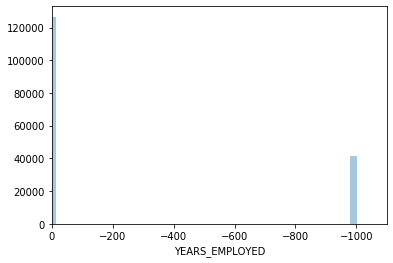

In [26]:
# Visualizing the histogram of Years Employed
sns.distplot(train['YEARS_EMPLOYED'],kde=False)
plt.xlim((0,-1100))
#plt.ylim(0,10000)


(0, 1000)

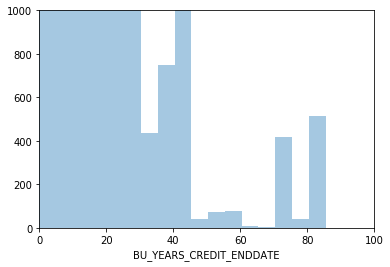

In [27]:
# Visualizing the histogram of BU_YEARS_CREDIT_ENDDATE
sns.distplot(train['BU_YEARS_CREDIT_ENDDATE'],bins = 40,kde=False)
plt.xlim((0,100))
plt.ylim((0,1000))

(0, 10)

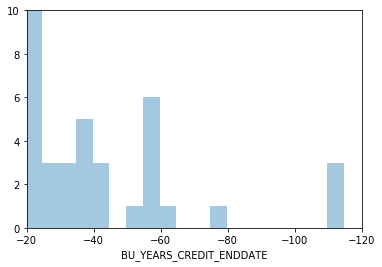

In [28]:
#Visualizing the histogram of BU_YEARS_CREDIT_ENDDATE
sns.distplot(train['BU_YEARS_CREDIT_ENDDATE'],bins = 40,kde=False)
plt.xlim((-20,-120))
plt.ylim((0,10))

### From the above histograms we can see that there are obvious extreme entries in the ''YEARS_EMPLOYED' & 'BU_YEARS_CREDIT_ENDDATE' columns. Thus we substitute these entries as np.nan values in both training & test dataset


In [29]:
# Since Years_employed can't be -ve , substituting these vale as NaNs in the training set
train['YEARS_EMPLOYED'].loc[train['YEARS_EMPLOYED'] < 0]=np.nan

In [30]:
train[ls].head()

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,BU_YEARS_CREDIT,BU_YEARS_CREDIT_ENDDATE,BU_YEARS_CREDIT_UPDATE,PREV_APP_YEARS_DECISION,INSTALL_PAY_YEARS_INSTALMENT,INSTALL_PAY_YEARS_ENTRY_PAYMENT
0,24.279452,3.857534,8.295891,1.843836,1.282192,-1.273973,-0.163442,-0.626370,-0.719863,-0.868493,-0.983562
1,66.145205,NaN,20.405479,12.608219,4.484931,-1.213699,2.789041,-0.032877,-1.965753,-2.268493,-2.289041
2,61.002740,NaN,4.400000,13.227397,2.041096,-4.232877,-3.230137,-3.087671,-1.510959,-0.968493,-0.989726
3,27.339726,5.320548,1.438356,0.282192,3.934247,NaN,NaN,NaN,-1.523288,-1.817808,-1.858904
4,23.484932,4.424658,8.997260,2.632877,-0.000000,-1.264384,1.141096,-0.324315,-2.536986,-2.246575,-2.264384


In [31]:
# Since Years_employed can't be -ve , substituting these vale as NaNs in the test set
test['YEARS_EMPLOYED'].loc[test['YEARS_EMPLOYED'] < 0]=np.nan

In [32]:
# Removing extreme outliers in the 'BU_YEARS_CREDIT_ENDDATE' column of training Dataset
train['BU_YEARS_CREDIT_ENDDATE'].loc[(train['BU_YEARS_CREDIT_ENDDATE'].between(60,100))| (train['BU_YEARS_CREDIT_ENDDATE'].between(-120,-50))]=np.nan

In [33]:
# Removing extreme outliers in the 'BU_YEARS_CREDIT_ENDDATE' column of test Dataset
test['BU_YEARS_CREDIT_ENDDATE'].loc[(test['BU_YEARS_CREDIT_ENDDATE'].between(60,100))| (test['BU_YEARS_CREDIT_ENDDATE'].between(-120,-50))]=np.nan

In [34]:
test['BU_YEARS_CREDIT_ENDDATE'].describe()

count    64998.000000
mean         1.364404
std          6.952623
min        -41.424656
25%         -1.942466
50%         -0.393151
75%          1.572603
max         59.879452
Name: BU_YEARS_CREDIT_ENDDATE, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

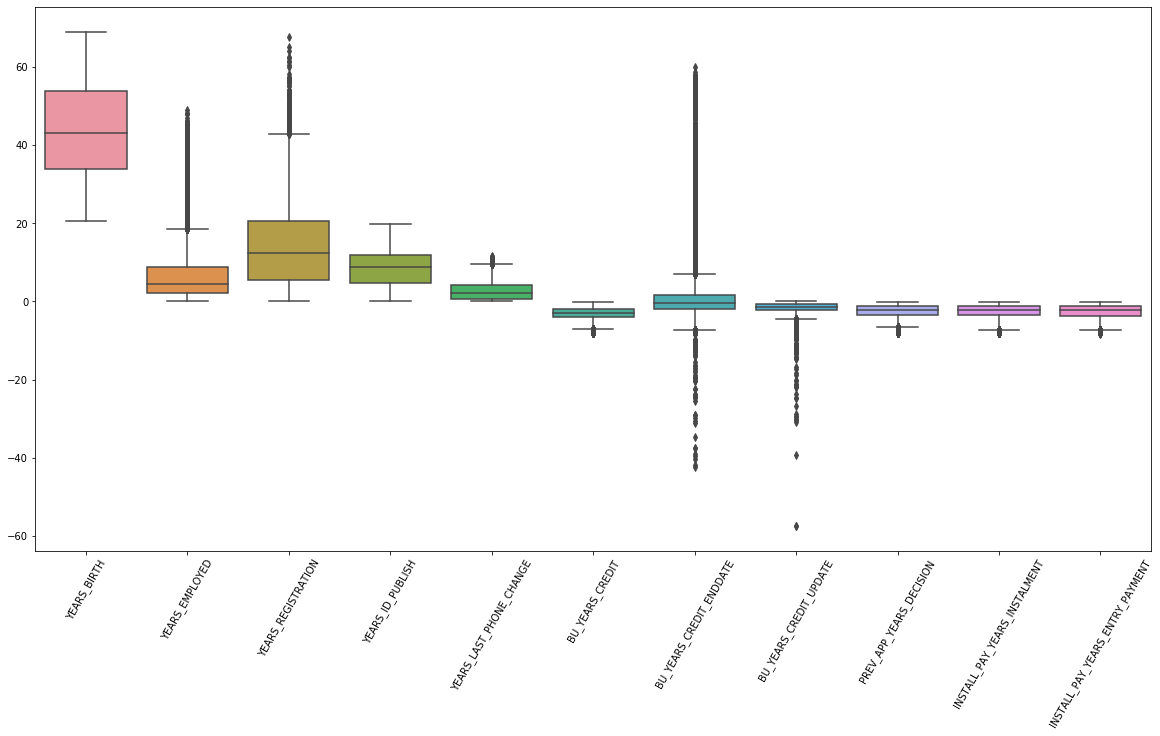

In [35]:
# Plotting the barplot of the Year columns of the application training datasets
fig=plt.figure(figsize=(20,10))
sns.boxplot(data=train[ls])
plt.xticks(rotation=60)

###  Lets separate the numerical columns of the train dataset

In [36]:
# segregating the numerical columns 
train_num = train.select_dtypes(include='number')

In [37]:
train_num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BU_YEARS_CREDIT,BU_CREDIT_DAY_OVERDUE,BU_YEARS_CREDIT_ENDDATE,BU_CNT_CREDIT_PROLONG,BU_AMT_CREDIT_SUM,BU_AMT_CREDIT_SUM_DEBT,BU_AMT_CREDIT_SUM_OVERDUE,BU_YEARS_CREDIT_UPDATE,BU_PREV_BU_LOAN_CNT,BU_CREDIT_ACTIVE_ACTIVE,BU_CREDIT_ACTIVE_CLOSED,BU_CREDIT_TYPE_CONSUMER CREDIT,BU_CREDIT_TYPE_CREDIT CARD,PREV_APP_AMT_ANNUITY,PREV_APP_AMT_APPLICATION,PREV_APP_AMT_CREDIT,PREV_APP_AMT_GOODS_PRICE,PREV_APP_HOUR_APPR_PROCESS_START,PREV_APP_NFLAG_LAST_APPL_IN_DAY,PREV_APP_YEARS_DECISION,PREV_APP_SELLERPLACE_AREA,PREV_APP_CNT_PAYMENT,PREV_APP_PREV_APP_CNT,PREV_APP_NAME_CONTRACT_TYPE_CASH LOANS,PREV_APP_NAME_CONTRACT_TYPE_CONSUMER LOANS,PREV_APP_NAME_CONTRACT_TYPE_REVOLVING LOANS,PREV_APP_WEEKDAY_APPR_PROCESS_START_FRIDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_MONDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_SATURDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_THURSDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_TUESDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,PREV_APP_FLAG_LAST_APPL_PER_CONTRACT_Y,PREV_APP_NAME_CASH_LOAN_PURPOSE_XAP,PREV_APP_NAME_CASH_LOAN_PURPOSE_XNA,PREV_APP_NAME_CONTRACT_STATUS_APPROVED,PREV_APP_NAME_CONTRACT_STATUS_CANCELED,PREV_APP_NAME_CONTRACT_STATUS_REFUSED,PREV_APP_NAME_PAYMENT_TYPE_CASH THROUGH THE BANK,PREV_APP_NAME_PAYMENT_TYPE_XNA,PREV_APP_CODE_REJECT_REASON_HC,PREV_APP_CODE_REJECT_REASON_LIMIT,PREV_APP_CODE_REJECT_REASON_XAP,PREV_APP_NAME_CLIENT_TYPE_NEW,PREV_APP_NAME_CLIENT_TYPE_REFRESHED,PREV_APP_NAME_CLIENT_TYPE_REPEATER,PREV_APP_NAME_GOODS_CATEGORY_AUDIO/VIDEO,PREV_APP_NAME_GOODS_CATEGORY_COMPUTERS,PREV_APP_NAME_GOODS_CATEGORY_CONSUMER ELECTRONICS,PREV_APP_NAME_GOODS_CATEGORY_MOBILE,PREV_APP_NAME_GOODS_CATEGORY_XNA,PREV_APP_NAME_PORTFOLIO_CARDS,PREV_APP_NAME_PORTFOLIO_CASH,PREV_APP_NAME_PORTFOLIO_POS,PREV_APP_NAME_PORTFOLIO_XNA,PREV_APP_NAME_PRODUCT_TYPE_XNA,PREV_APP_NAME_PRODUCT_TYPE_X-SELL,PREV_APP_CHANNEL_TYPE_COUNTRY-WIDE,PREV_APP_CHANNEL_TYPE_CREDIT AND CASH OFFICES,PREV_APP_CHANNEL_TYPE_REGIONAL / LOCAL,PREV_APP_CHANNEL_TYPE_STONE,PREV_APP_NAME_SELLER_INDUSTRY_CONNECTIVITY,PREV_APP_NAME_SELLER_INDUSTRY_CONSUMER ELECTRONICS,PREV_APP_NAME_SELLER_INDUSTRY_XNA,PREV_APP_NAME_YIELD_GROUP_XNA,PREV_APP_NAME_YIELD_GROUP_HIGH,PREV_APP_NAME_YIELD_GROUP_LOW_NORMAL,PREV_APP_NAME_YIELD_GROUP_MIDDLE,PREV_APP_PRODUCT_COMBINATION_CARD STREET,PREV_APP_PRODUCT_COMBINATION_CARD X-SELL,PREV_APP_PRODUCT_COMBINATION_CASH,PREV_APP_PRODUCT_COMBINATION_CASH STREET: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: LOW,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: MIDDLE,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITHOUT INTEREST,PREV_APP_PRODUCT_COMBINATION_POS INDUSTRY WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS MOBILE WITH INTEREST,POS_CASH_MONTHS_BALANCE,POS_CASH_CNT_INSTALMENT,POS_CASH_CNT_INSTALMENT_FUTURE,POS_CASH_SK_DPD,POS_CASH_SK_DPD_DE

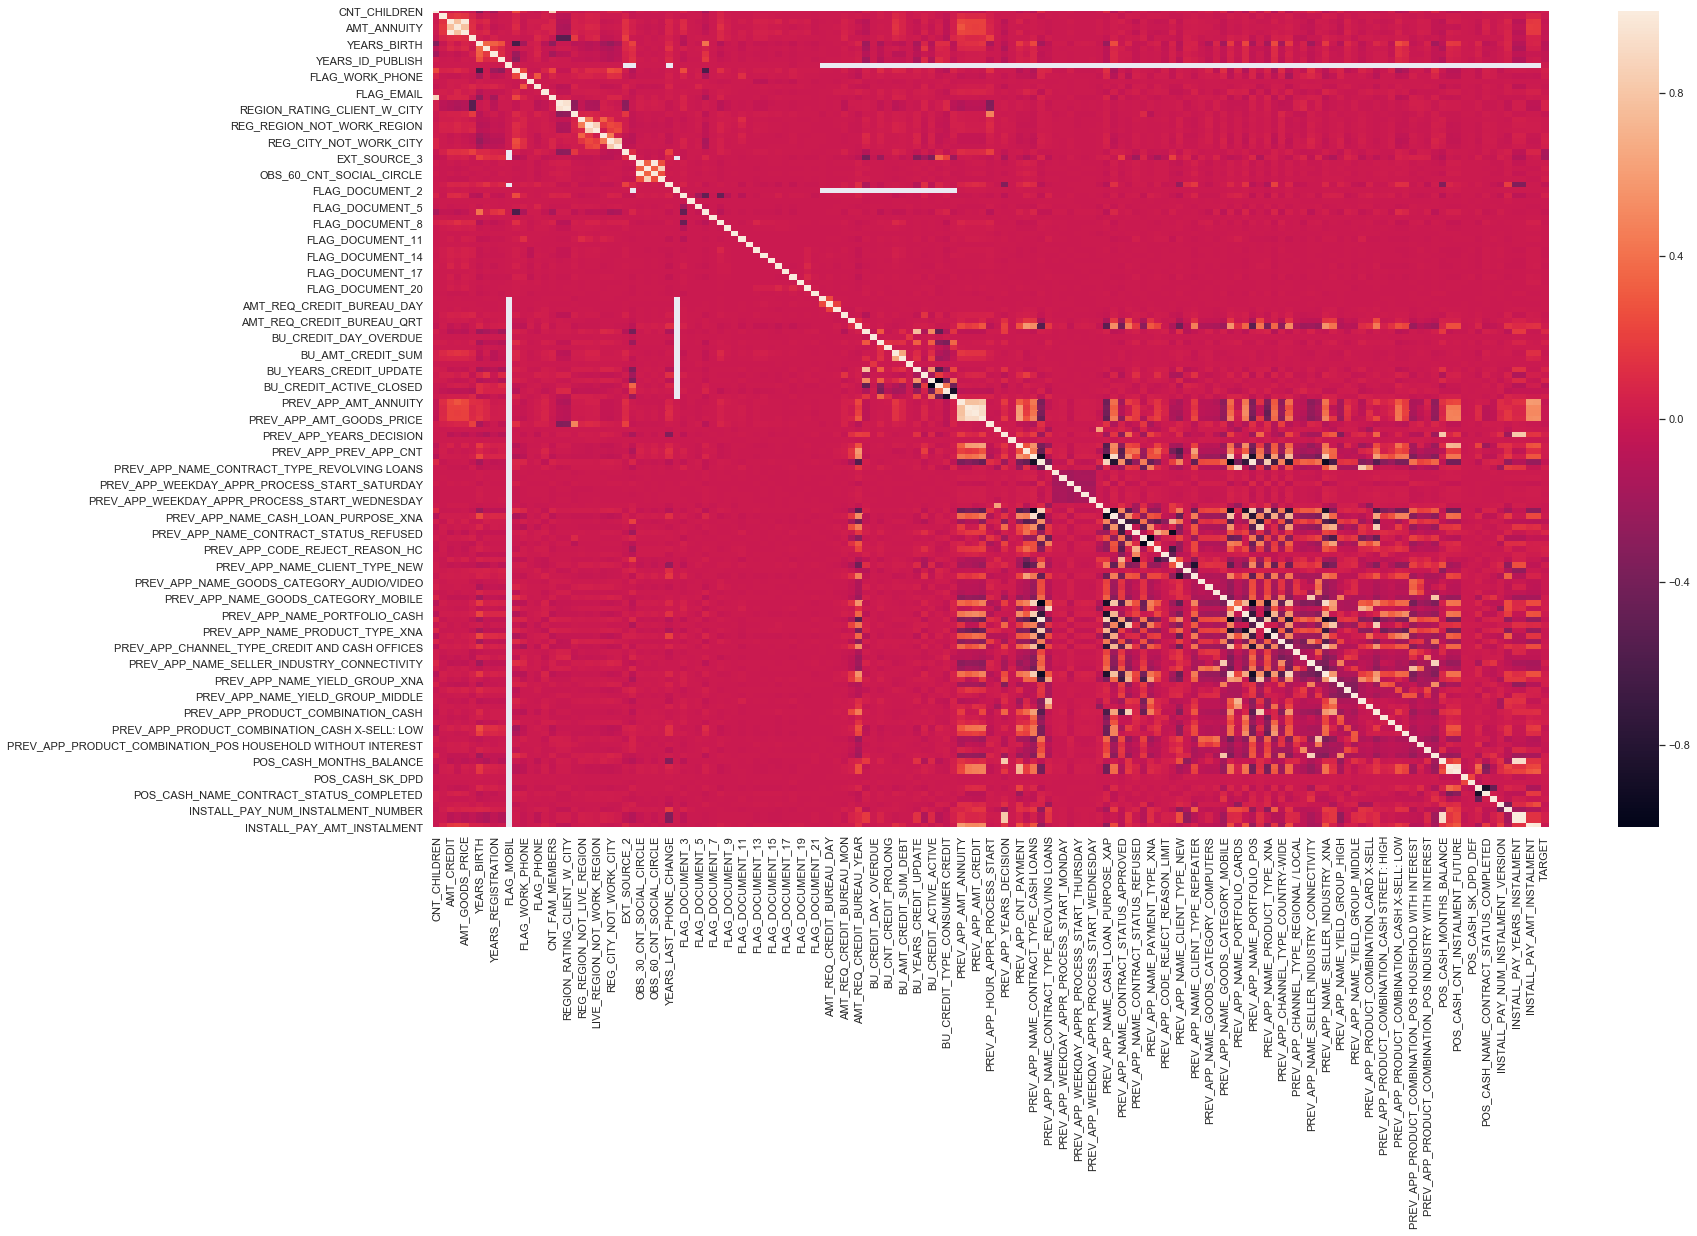

In [42]:
# Plotting the correlation between various numerical columns of the training data
fig=plt.figure(figsize=(25,15))
sns.set()
sns.heatmap(train_num.corr())

In [44]:
train_num[['FLAG_MOBIL','AMT_REQ_CREDIT_BUREAU_DAY']].corr()

,FLAG_MOBIL,AMT_REQ_CREDIT_BUREAU_DAY
FLAG_MOBIL,1.0,NaN
AMT_REQ_CREDIT_BUREAU_DAY,NaN,1.0


In [46]:
#Finding which numerical columns have missing values
df_temp = train_num.isna().sum()
df_temp = df_temp.loc[df_temp > 0]
train_num_miss = train_num[df_temp.index]  

In [47]:
train_num_miss.isna().sum()

AMT_ANNUITY                                                        9
AMT_GOODS_PRICE                                                  201
YEARS_EMPLOYED                                                 41396
CNT_FAM_MEMBERS                                                    1
EXT_SOURCE_2                                                     494
EXT_SOURCE_3                                                   45725
OBS_30_CNT_SOCIAL_CIRCLE                                         767
DEF_30_CNT_SOCIAL_CIRCLE                                         767
OBS_60_CNT_SOCIAL_CIRCLE                                         767
DEF_60_CNT_SOCIAL_CIRCLE                                         767
YEARS_LAST_PHONE_CHANGE                                            1
AMT_REQ_CREDIT_BUREAU_HOUR                                     31165
AMT_REQ_CREDIT_BUREAU_DAY                                      31165
AMT_REQ_CREDIT_BUREAU_WEEK                                     31165
AMT_REQ_CREDIT_BUREAU_MON         

In [48]:
train_num_miss.isna().sum().sum()

1709468

In [49]:
# Finding Interquartile range for every missing value numerical column of training data
S_U = train_num_miss.quantile(q=.75)
S_L = train_num_miss.quantile(q=.25)
S_IQR = S_U - S_L # Interquantile range IQR
S_Max = S_U + (1.5*S_IQR)
S_Min = S_L - (1.5*S_IQR)


In [50]:
# Calculating no. of outliers in each numerical column , having missing values in the  training dataset. 
train_med_mean = ((train_num_miss > S_Max ) | (train_num_miss < S_Min )).sum()

In [51]:
train_med_mean

AMT_ANNUITY                                                     5659
AMT_GOODS_PRICE                                                11062
YEARS_EMPLOYED                                                 11370
CNT_FAM_MEMBERS                                                 2984
EXT_SOURCE_2                                                       0
EXT_SOURCE_3                                                       0
OBS_30_CNT_SOCIAL_CIRCLE                                       15013
DEF_30_CNT_SOCIAL_CIRCLE                                       26381
OBS_60_CNT_SOCIAL_CIRCLE                                       14705
DEF_60_CNT_SOCIAL_CIRCLE                                       19276
YEARS_LAST_PHONE_CHANGE                                          324
AMT_REQ_CREDIT_BUREAU_HOUR                                      1190
AMT_REQ_CREDIT_BUREAU_DAY                                       1104
AMT_REQ_CREDIT_BUREAU_WEEK                                      6376
AMT_REQ_CREDIT_BUREAU_MON         

In [52]:
# Segregating Mean columns from median columns
median_cols = [col for col in train_med_mean.index if train_med_mean[col] > 0]
mean_cols = [col for col in train_med_mean.index if train_med_mean[col] == 0] 

In [53]:
# importing simple imputer from sklearn
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(strategy='median')

In [54]:
# Imputing median for columns having outliers in numerical columns of training dataset
train_num[median_cols] = s_imputer.fit_transform(train_num[median_cols])

In [55]:
# Imputing median for columns having outliers in numerical columns of training dataset 
#for missing values in test dataset
test[median_cols] = s_imputer.transform(test[median_cols])

In [56]:
s_imputer_mean = SimpleImputer(strategy='mean')

In [57]:
# Imputing mean for columns having no outliers in numerical columns of training dataset
train_num[mean_cols] = s_imputer_mean.fit_transform(train_num[mean_cols])

In [58]:
# Imputing mean for columns having no outliers in numerical columns of training dataset
# for missing values in test dataset
test[mean_cols] = s_imputer_mean.transform(test[mean_cols])

In [59]:
# Checking if numerical columns of training data have any more missing values
print('No. of missing values in the numerical columns of the training dataset are: ',train_num.isna().sum().sum())

No. of missing values in the numerical columns of the training dataset are:  0


In [60]:
# Checking if numerical columns of test data have any more missing values
print('No. of missing values in the numerical columns of the test dataset are: ',test[train_num.columns].isna().sum().sum())

No. of missing values in the numerical columns of the test dataset are:  0


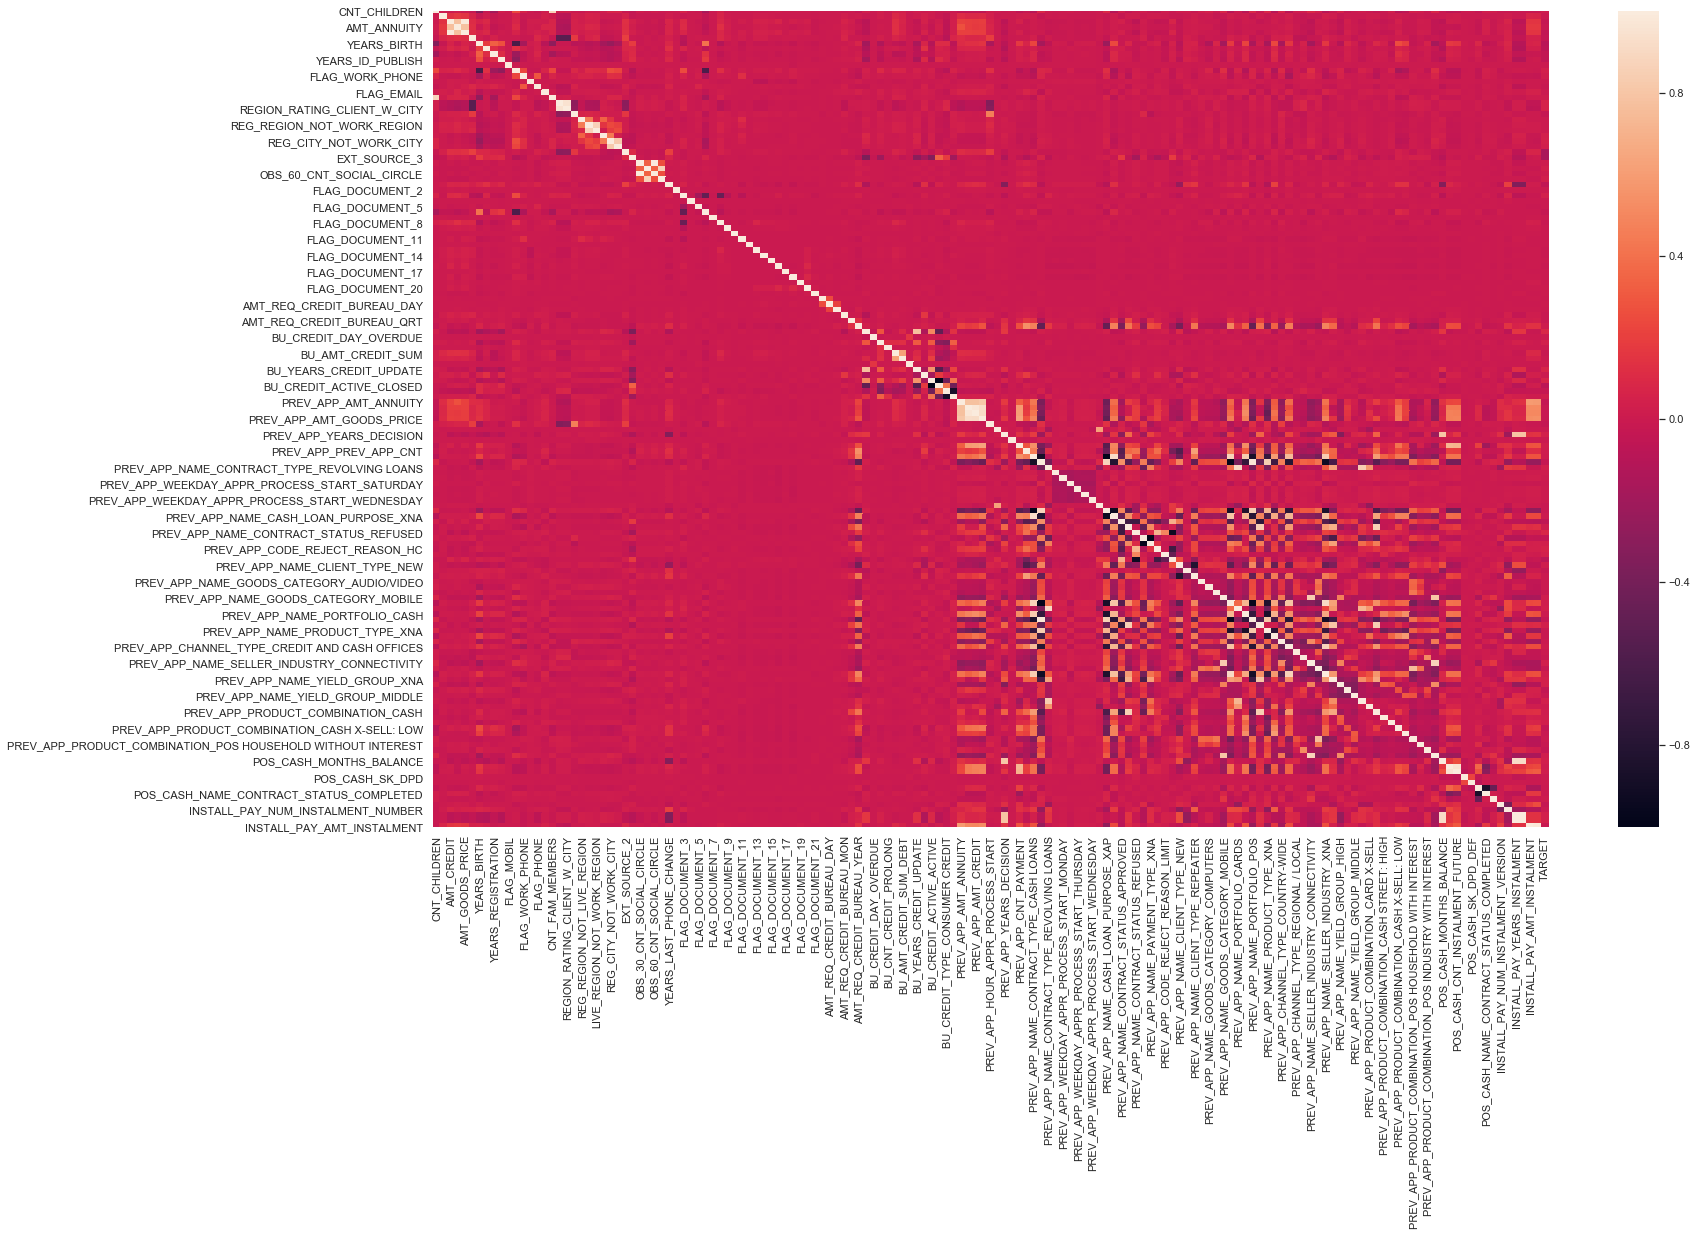

In [61]:
# Plotting the correlation between various numerical columns of the training data
fig=plt.figure(figsize=(25,15))
sns.set()
sns.heatmap(train_num.corr())

### Thus from above we see that there are no missing values in numerical columns of both training & test data sets.
### Processing the categorical columns of the training dataset.

In [325]:
# Segregating the categorical columns of the training data
train_cat = train.select_dtypes(include='category')

In [326]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Data columns (total 11 columns):
NAME_CONTRACT_TYPE            230633 non-null category
CODE_GENDER                   230633 non-null category
FLAG_OWN_CAR                  230633 non-null category
FLAG_OWN_REALTY               230633 non-null category
NAME_TYPE_SUITE               229666 non-null category
NAME_INCOME_TYPE              230633 non-null category
NAME_EDUCATION_TYPE           230633 non-null category
NAME_FAMILY_STATUS            230633 non-null category
NAME_HOUSING_TYPE             230633 non-null category
WEEKDAY_APPR_PROCESS_START    230633 non-null category
ORGANIZATION_TYPE             230633 non-null category
dtypes: category(11)
memory usage: 2.4 MB


In [327]:
# Looking for missing values in the category columns
train_cat.isna().sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
NAME_TYPE_SUITE               967
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
WEEKDAY_APPR_PROCESS_START      0
ORGANIZATION_TYPE               0
dtype: int64

In [354]:
# Getting the value_counts of the Organization_Type column
train_cat.ORGANIZATION_TYPE.value_counts(dropna=False)

Business_Entity        63484
XNA                    41396
Self-employed          28626
Other                  16836
Industry               10772
Trade                  10700
Medicine                8489
Government              7852
Transport               6726
School                  6717
Kindergarten            5233
Construction            5027
Security                2463
Housing                 2197
Military                1993
Bank                    1886
Agriculture             1856
Police                  1724
Postal                  1634
Security Ministries     1495
Restaurant              1360
Services                1183
University               984
Name: ORGANIZATION_TYPE, dtype: int64

In [329]:
# Replacing all Industry type values in Organization type column of train_cat to Industry
train_cat['ORGANIZATION_TYPE'].replace(to_replace='Industry: type \w+',value='Industry',inplace=True,regex=True)

In [330]:
# Replacing all Transport type values in Organization type column of train_cat to Transport
train_cat['ORGANIZATION_TYPE'].replace(to_replace='Transport: type \w+',value='Transport',inplace=True,regex=True)

In [331]:
# Replacing all Trade type values in Organization type column of train_cat to Trade
train_cat['ORGANIZATION_TYPE'].replace(to_replace='Trade: type \w+',value='Trade',inplace=True,regex=True)

In [332]:
# Replacing all Business Entity type values in Organization type column of train_cat to Business Entity
train_cat['ORGANIZATION_TYPE'].replace(to_replace='Business Entity Type \w+',value='Business_Entity',inplace=True,regex=True)

In [338]:
train_cat['ORGANIZATION_TYPE'].nunique()

23

In [334]:
# categories to merge in the Organization type column of the train_cat
cat_merge=['Hotel','Electricity','Insurance','Emergency','Telecom','Advertising','Realtor','Culture',
           'Legal Services','Mobile','Cleaning','Religion']

In [335]:
train_cat['ORGANIZATION_TYPE'].loc[train_cat['ORGANIZATION_TYPE'].isin(cat_merge)] = 'Other'

In [336]:
# Converting the data type of the Organization type column from object to category
train_cat['ORGANIZATION_TYPE'] = train_cat['ORGANIZATION_TYPE'].astype('category')

### Processing the categorical columns of the test dataset.

In [351]:
test['ORGANIZATION_TYPE'].value_counts()

Business_Entity        21045
XNA                    13978
Self-employed           9786
Other                   5668
Trade                   3615
Industry                3539
Medicine                2704
Government              2552
Transport               2264
School                  2176
Construction            1694
Kindergarten            1647
Security                 784
Housing                  761
Military                 641
Bank                     621
Police                   617
Agriculture              598
Postal                   523
Security Ministries      479
Restaurant               451
Services                 392
University               343
Name: ORGANIZATION_TYPE, dtype: int64

In [340]:
# Replacing all Industry type values in Organization type column of test set to Industry
test['ORGANIZATION_TYPE'].replace(to_replace='Industry: type \w+',value='Industry',inplace=True,regex=True)

In [342]:
# Replacing all Transport type values in Organization type column of test set to Transport
test['ORGANIZATION_TYPE'].replace(to_replace='Transport: type \w+',value='Transport',inplace=True,regex=True)

In [344]:
# Replacing all Trade type values in Organization type column of test set to Trade
test['ORGANIZATION_TYPE'].replace(to_replace='Trade: type \w+',value='Trade',inplace=True,regex=True)

In [346]:
# Replacing all Business Entity type values in Organization type column of test set to Business Entity
test['ORGANIZATION_TYPE'].replace(to_replace='Business Entity Type \w+',value='Business_Entity',inplace=True,regex=True)

In [348]:
# Categories to merge in the Organization type column of the train_cat
test['ORGANIZATION_TYPE'].loc[test['ORGANIZATION_TYPE'].isin(cat_merge)] = 'Other'

In [350]:
# Converting the data type of the Organization type column from object to category
test['ORGANIZATION_TYPE'] = test['ORGANIZATION_TYPE'].astype('category')

In [352]:
test['ORGANIZATION_TYPE'].nunique()

23

In [353]:
# Getting the info of the categorical columns of test set
test[train_cat.columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76878 entries, 0 to 76877
Data columns (total 11 columns):
NAME_CONTRACT_TYPE            76878 non-null category
CODE_GENDER                   76878 non-null category
FLAG_OWN_CAR                  76878 non-null category
FLAG_OWN_REALTY               76878 non-null category
NAME_TYPE_SUITE               76553 non-null category
NAME_INCOME_TYPE              76878 non-null category
NAME_EDUCATION_TYPE           76878 non-null category
NAME_FAMILY_STATUS            76878 non-null category
NAME_HOUSING_TYPE             76878 non-null category
WEEKDAY_APPR_PROCESS_START    76878 non-null category
ORGANIZATION_TYPE             76878 non-null category
dtypes: category(11)
memory usage: 828.8 KB


In [355]:
# Getting the info of the categorical columns of train set
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Data columns (total 11 columns):
NAME_CONTRACT_TYPE            230633 non-null category
CODE_GENDER                   230633 non-null category
FLAG_OWN_CAR                  230633 non-null category
FLAG_OWN_REALTY               230633 non-null category
NAME_TYPE_SUITE               229666 non-null category
NAME_INCOME_TYPE              230633 non-null category
NAME_EDUCATION_TYPE           230633 non-null category
NAME_FAMILY_STATUS            230633 non-null category
NAME_HOUSING_TYPE             230633 non-null category
WEEKDAY_APPR_PROCESS_START    230633 non-null category
ORGANIZATION_TYPE             230633 non-null category
dtypes: category(11)
memory usage: 2.4 MB


In [356]:
# Making copies of the train & test sets
#test_copy=test.copy()
#train_num_copy=train_num.copy()
#train_cat_copy=train_cat.copy()

In [357]:
# Getting the dummies for the categorical columns of the train set
train_cat = pd.get_dummies(train_cat)

In [358]:
train_cat.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [363]:
# Columns to remove from the categorial columns to remove Linear dependency from both train and test set
cols_cat = ['NAME_CONTRACT_TYPE_Revolving loans','CODE_GENDER_M','CODE_GENDER_XNA','FLAG_OWN_CAR_Y',
            'FLAG_OWN_REALTY_N','NAME_TYPE_SUITE_Group of people','NAME_TYPE_SUITE_Other_A','NAME_TYPE_SUITE_Other_B',
           'NAME_INCOME_TYPE_Maternity leave','NAME_INCOME_TYPE_Student','NAME_INCOME_TYPE_Unemployed',
           'NAME_INCOME_TYPE_Businessman','NAME_EDUCATION_TYPE_Academic degree','NAME_FAMILY_STATUS_Unknown',
            'NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_Co-op apartment','WEEKDAY_APPR_PROCESS_START_SUNDAY',
            'ORGANIZATION_TYPE_Other']

In [364]:
len(train_cat.columns)

71

In [359]:
# Getting the dummies for the categorical columns of the test set
test = pd.get_dummies(test)

In [360]:
test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BU_YEARS_CREDIT,BU_CREDIT_DAY_OVERDUE,BU_YEARS_CREDIT_ENDDATE,BU_CNT_CREDIT_PROLONG,BU_AMT_CREDIT_SUM,BU_AMT_CREDIT_SUM_DEBT,BU_AMT_CREDIT_SUM_OVERDUE,BU_YEARS_CREDIT_UPDATE,BU_PREV_BU_LOAN_CNT,BU_CREDIT_ACTIVE_ACTIVE,BU_CREDIT_ACTIVE_CLOSED,BU_CREDIT_TYPE_CONSUMER CREDIT,BU_CREDIT_TYPE_CREDIT CARD,PREV_APP_AMT_ANNUITY,PREV_APP_AMT_APPLICATION,PREV_APP_AMT_CREDIT,PREV_APP_AMT_GOODS_PRICE,PREV_APP_HOUR_APPR_PROCESS_START,PREV_APP_NFLAG_LAST_APPL_IN_DAY,PREV_APP_YEARS_DECISION,PREV_APP_SELLERPLACE_AREA,PREV_APP_CNT_PAYMENT,PREV_APP_PREV_APP_CNT,PREV_APP_NAME_CONTRACT_TYPE_CASH LOANS,PREV_APP_NAME_CONTRACT_TYPE_CONSUMER LOANS,PREV_APP_NAME_CONTRACT_TYPE_REVOLVING LOANS,PREV_APP_WEEKDAY_APPR_PROCESS_START_FRIDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_MONDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_SATURDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_THURSDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_TUESDAY,PREV_APP_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,PREV_APP_FLAG_LAST_APPL_PER_CONTRACT_Y,PREV_APP_NAME_CASH_LOAN_PURPOSE_XAP,PREV_APP_NAME_CASH_LOAN_PURPOSE_XNA,PREV_APP_NAME_CONTRACT_STATUS_APPROVED,PREV_APP_NAME_CONTRACT_STATUS_CANCELED,PREV_APP_NAME_CONTRACT_STATUS_REFUSED,PREV_APP_NAME_PAYMENT_TYPE_CASH THROUGH THE BANK,PREV_APP_NAME_PAYMENT_TYPE_XNA,PREV_APP_CODE_REJECT_REASON_HC,PREV_APP_CODE_REJECT_REASON_LIMIT,PREV_APP_CODE_REJECT_REASON_XAP,PREV_APP_NAME_CLIENT_TYPE_NEW,PREV_APP_NAME_CLIENT_TYPE_REFRESHED,PREV_APP_NAME_CLIENT_TYPE_REPEATER,PREV_APP_NAME_GOODS_CATEGORY_AUDIO/VIDEO,PREV_APP_NAME_GOODS_CATEGORY_COMPUTERS,PREV_APP_NAME_GOODS_CATEGORY_CONSUMER ELECTRONICS,PREV_APP_NAME_GOODS_CATEGORY_MOBILE,PREV_APP_NAME_GOODS_CATEGORY_XNA,PREV_APP_NAME_PORTFOLIO_CARDS,PREV_APP_NAME_PORTFOLIO_CASH,PREV_APP_NAME_PORTFOLIO_POS,PREV_APP_NAME_PORTFOLIO_XNA,PREV_APP_NAME_PRODUCT_TYPE_XNA,PREV_APP_NAME_PRODUCT_TYPE_X-SELL,PREV_APP_CHANNEL_TYPE_COUNTRY-WIDE,PREV_APP_CHANNEL_TYPE_CREDIT AND CASH OFFICES,PREV_APP_CHANNEL_TYPE_REGIONAL / LOCAL,PREV_APP_CHANNEL_TYPE_STONE,PREV_APP_NAME_SELLER_INDUSTRY_CONNECTIVITY,PREV_APP_NAME_SELLER_INDUSTRY_CONSUMER ELECTRONICS,PREV_APP_NAME_SELLER_INDUSTRY_XNA,PREV_APP_NAME_YIELD_GROUP_XNA,PREV_APP_NAME_YIELD_GROUP_HIGH,PREV_APP_NAME_YIELD_GROUP_LOW_NORMAL,PREV_APP_NAME_YIELD_GROUP_MIDDLE,PREV_APP_PRODUCT_COMBINATION_CARD STREET,PREV_APP_PRODUCT_COMBINATION_CARD X-SELL,PREV_APP_PRODUCT_COMBINATION_CASH,PREV_APP_PRODUCT_COMBINATION_CASH STREET: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: HIGH,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: LOW,PREV_APP_PRODUCT_COMBINATION_CASH X-SELL: MIDDLE,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS HOUSEHOLD WITHOUT INTEREST,PREV_APP_PRODUCT_COMBINATION_POS INDUSTRY WITH INTEREST,PREV_APP_PRODUCT_COMBINATION_POS MOBILE WITH INTEREST,POS_CASH_MONTHS_BALANCE,POS_CASH_CNT_INSTALMENT,POS_CASH_CNT_INSTALMENT_FUTURE,POS_CASH_SK_DPD,POS_CASH_SK_DPD_DE

In [365]:
# Removing unwanted categorical columns from training set
train_cat.drop(columns = cols_cat, inplace = True)

In [369]:
# Removing unwanted categorical columns from test set
test.drop(columns = cols_cat, inplace = True)

In [371]:
# Concatenating the numerical & categorical columns of the train set
train_clean=pd.concat([train_num,train_cat],axis=1)

In [378]:
print('Are no.of rows of train set equal to those of train_clean :',len(train_clean)==len(train))

Are no.of rows of train set equal to those of train_clean : True


In [379]:
print('Are no.of columns of train_clean set equal to those of test set :',len(train_clean.columns)==len(test.columns))

Are no.of columns of train_clean set equal to those of test set : True


In [380]:
#Checking for the no. of  missing values in train_clean dataset
train_clean.isna().sum().sum()

0

In [381]:
#Checking for the no. of  missing values in test dataset
test.isna().sum().sum()

0

### From above we can see that the both training & test datasets are clean . Hence we can now proceed towards Feature Engineering (if needed) & Feature importance.

In [382]:
# Saving the clean training dataset
train_clean.to_csv('train_clean.csv',index=False)

In [383]:
# Saving the clean test dataset
test.to_csv('test_clean.csv',index=False)